In [1]:
# Import libraries
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score as acs
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
data = pd.read_csv("cleaneddata.csv")

# Split the data into features (X) and target (y)
# Assuming 'Condition' is the target column and the rest are features
X = data.drop(columns=['Condition'])  # Features
y = data['Condition']  # Target

# Convert X and y to DataFrames
X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Print the length of the data
print("Data length:", len(y))

Data length: 116


In [5]:
# create save path
path = os.getcwd()
savePath = path + '/Random_forest_results/'
print(savePath)

C:\Users\Jason/Random_forest_results/



Starting cross-validation process...


Processing Fold 1
Fold 1 - Training data length: 87
Fold 1 - Verification data length: 29
Fold 1 - Accuracy: 0.931


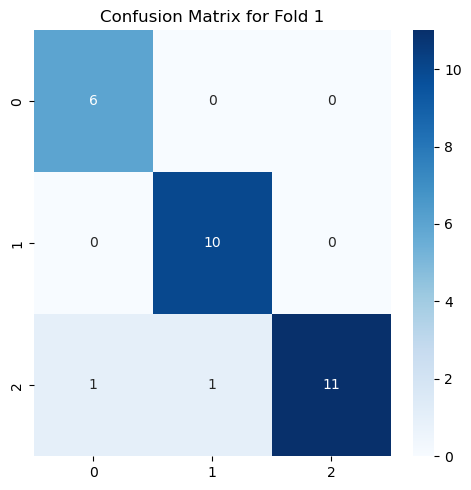

Fold 1 - Random Forest Classification Report:
               precision    recall  f1-score   support

  Condition1       0.86      1.00      0.92         6
  Condition3       0.91      1.00      0.95        10
     Normal1       1.00      0.85      0.92        13

    accuracy                           0.93        29
   macro avg       0.92      0.95      0.93        29
weighted avg       0.94      0.93      0.93        29

Fold 1 - Results saved to CSV and confusion matrix image.


Processing Fold 2
Fold 2 - Training data length: 87
Fold 2 - Verification data length: 29
Fold 2 - Accuracy: 0.8621


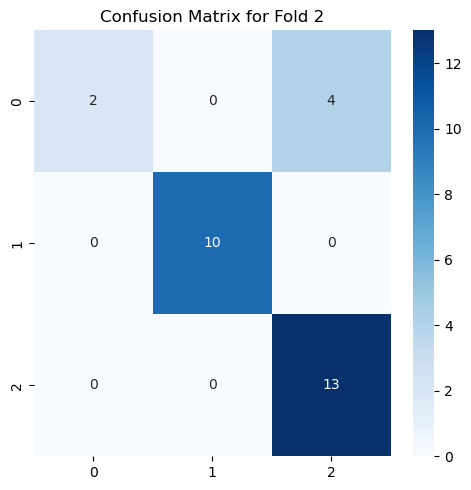

Fold 2 - Random Forest Classification Report:
               precision    recall  f1-score   support

  Condition1       1.00      0.33      0.50         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.76      1.00      0.87        13

    accuracy                           0.86        29
   macro avg       0.92      0.78      0.79        29
weighted avg       0.89      0.86      0.84        29

Fold 2 - Results saved to CSV and confusion matrix image.


Processing Fold 3
Fold 3 - Training data length: 87
Fold 3 - Verification data length: 29
Fold 3 - Accuracy: 0.9655


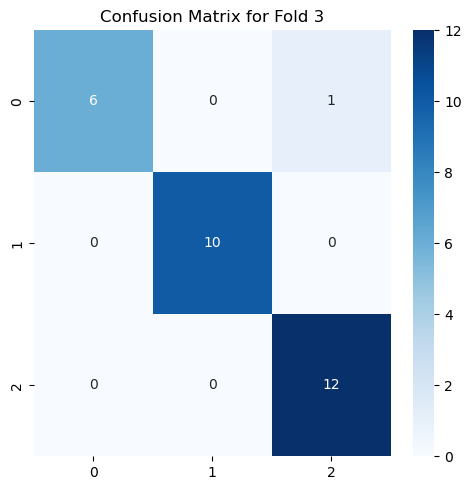

Fold 3 - Random Forest Classification Report:
               precision    recall  f1-score   support

  Condition1       1.00      0.86      0.92         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      1.00      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.96        29

Fold 3 - Results saved to CSV and confusion matrix image.


Processing Fold 4
Fold 4 - Training data length: 87
Fold 4 - Verification data length: 29
Fold 4 - Accuracy: 0.931


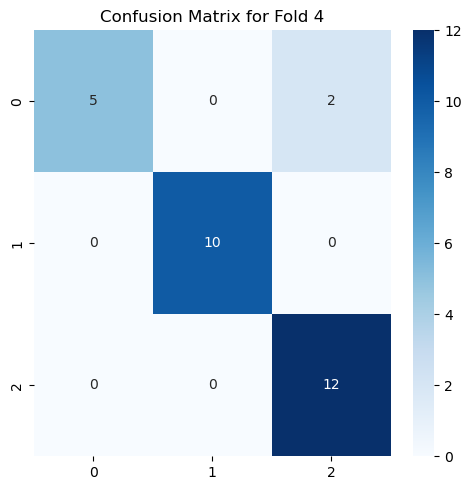

Fold 4 - Random Forest Classification Report:
               precision    recall  f1-score   support

  Condition1       1.00      0.71      0.83         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.86      1.00      0.92        12

    accuracy                           0.93        29
   macro avg       0.95      0.90      0.92        29
weighted avg       0.94      0.93      0.93        29

Fold 4 - Results saved to CSV and confusion matrix image.


Random Forest mean accuracy score across all folds: 0.9224


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)

# Split data into training and testing sets with Stratified K-Folds
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Accuracy list and save path
accuracy_l = []
savePath = "/path/to/save/results"  # Update with your actual directory

print("\nStarting cross-validation process...\n")

for fold, (tr_i, te_i) in enumerate(cv.split(X, y), start=1):
    print(f"\nProcessing Fold {fold}")
    
    # Split the data into training and testing for the current fold
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]

    print(f"Fold {fold} - Training data length:", len(y_tr))
    print(f"Fold {fold} - Verification data length:", len(y_v))
    
    # Fit random forest model and predict y_p
    rf_model.fit(X_tr, y_tr)
    y_p = rf_model.predict(X_v)
    
    # Calculate accuracy
    accuracy = np.mean(accuracy_score(y_v, y_p))
    
    print(f"Fold {fold} - Accuracy:", round(accuracy, 4))
    accuracy_l.append(accuracy)

    # Plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues', ax=ax)
    plt.title(f"Confusion Matrix for Fold {fold}")
    plt.tight_layout()
    plt.savefig(f"{savePath}/confusion_matrix_rf_fold_{fold}.png")
    plt.show()
    
    # Classification report
    print(f"Fold {fold} - Random Forest Classification Report:\n", classification_report(y_v, y_p))

    # Reset the index for original test data and predicted values
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True, inplace=True)
    
    # Concatenate X_v, y_v, and predicted values y_p into a single DataFrame
    result_df = pd.concat([X_v, y_v], axis=1).copy()
    result_df['Predicted'] = y_p  # Add predictions as a new column
    result_df.to_csv(f"{savePath}/cv_results_rf_fold_{fold}.csv", index=False)

    print(f"Fold {fold} - Results saved to CSV and confusion matrix image.\n")

# Calculate and print the mean accuracy score across all folds
mean_score = round(np.mean(accuracy_l), 4)
print(f'\nRandom Forest mean accuracy score across all folds: {mean_score}')


Feature names: ['Switch-over volume', 'Material cushion', 'Cylinder heating zone 1', 'Cylinder heating zone 5', 'Maximum injection pressure', 'Cylinder heating zone 2', 'Cylinder heating zone 3', 'Dosage time', 'Cylinder heating zone 4', 'Injection time', 'Mould temperature control unit 1', 'Cycle time']
Feature importance: [0.3109562  0.22235301 0.08595924 0.07710949 0.06355683 0.05583515
 0.04343578 0.04202152 0.03220363 0.02547813 0.02180212 0.01928889]


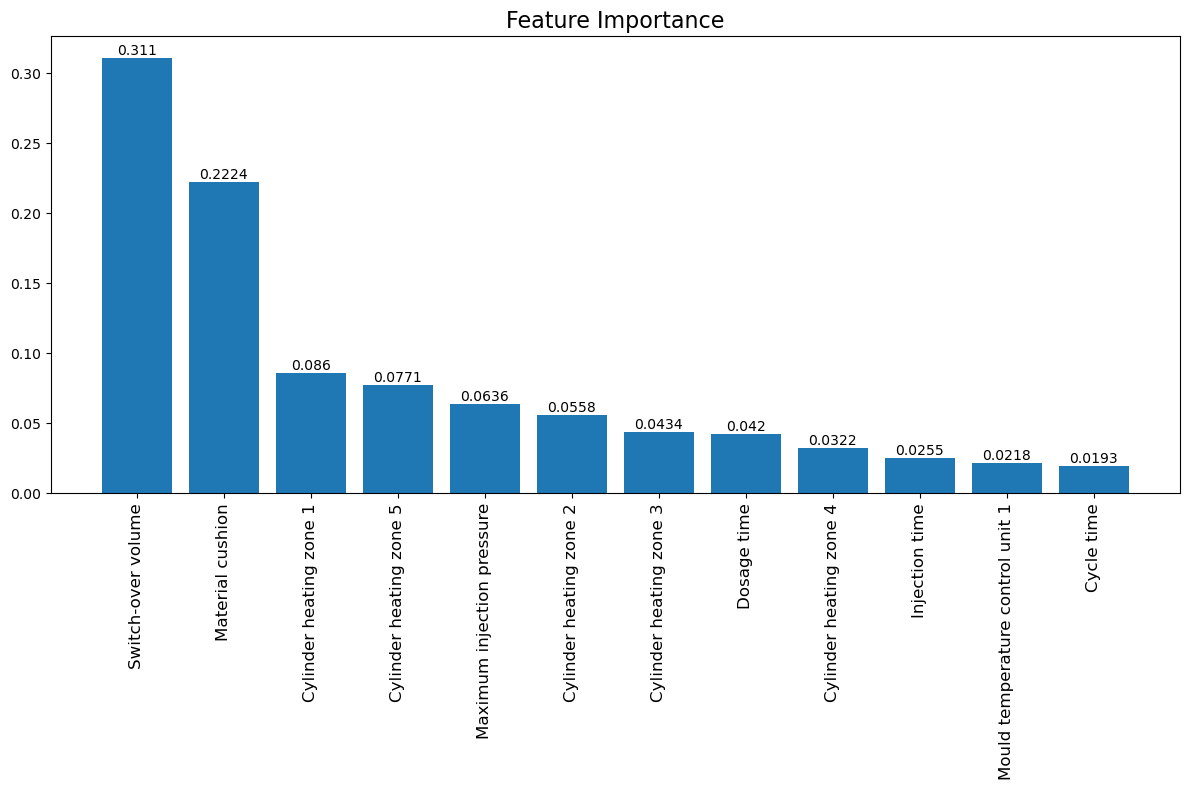


Top 2 features: ['Switch-over volume', 'Material cushion']
Top 2 feature data:
     Switch-over volume  Material cushion
0               1.44334          0.918447
1               1.41334          0.929772
2               1.44334          0.899388
3               1.34334          0.996952
4               1.47334          0.929580
..                  ...               ...
111             1.39334          0.950520
112             1.42334          0.910520
113             1.40334          0.898255
114             1.44334          0.868255
115             1.44334          0.980734

[116 rows x 2 columns]


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaneddata.csv')

# Separate features and target
features = df.drop(columns=['Condition'])
target = df['Condition']

# Assuming rf_model is already defined and trained
# Calculate feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features.columns[i] for i in indices]
print("Feature names:", names)
print("Feature importance:", importances[indices])

# Create a larger figure
plt.figure(figsize=(12, 8))  # Adjust the width and height for better visibility

# Create plot title
plt.title("Feature Importance", fontsize=16)

# Add bars with adjusted bar width for better spacing
bars = plt.bar(range(features.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90, fontsize=12)

# Annotate each bar with its height (importance value)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

# Extract the top 2 features
top_2_indices = indices[:2]  # Get the indices of the top 2 features
top_2_names = [features.columns[i] for i in top_2_indices]  # Get their names
top_2_data = features.iloc[:, top_2_indices]  # Extract the data for the top 2 features

print(f"\nTop 2 features: {top_2_names}")
print(f"Top 2 feature data:\n{top_2_data}")




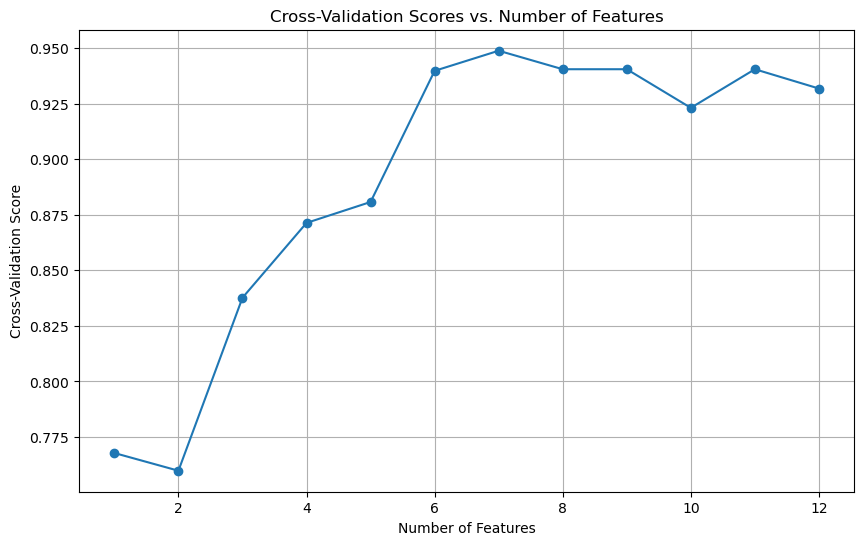

The optimal number of features selected by RFE: 7

Selected features with the best performance: Index(['Cylinder heating zone 1', 'Cylinder heating zone 2',
       'Cylinder heating zone 3', 'Cylinder heating zone 5',
       'Maximum injection pressure', 'Switch-over volume', 'Material cushion'],
      dtype='object')

Training Data (75% of total):
     Cylinder heating zone 1  Cylinder heating zone 2  \
22                278.513125                   292.23   
62                289.580000                   306.65   
114               297.240000                   294.73   
80                281.580000                   301.98   
30                279.230000                   304.70   
..                       ...                      ...   
106               294.380000                   303.22   
14                275.430000                   307.63   
92                303.140000                   299.41   
51                281.700000                   289.09   
102               279.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('cleaneddata.csv')

# Separate features and target
features = df.drop(columns=['Condition'])
target = df['Condition']

# Define a new Random Forest model for RFE with a fixed random_state
rf_model = RandomForestClassifier(random_state=42)

# Initialize the list to store cross-validation scores for each number of features
cv_scores = []

# Fixed random state for reproducibility in feature selection
fixed_random_state = 42

# Iterate over different numbers of features to select, from 1 to the total number of features
for n_features in range(1, features.shape[1] + 1):
    rfe = RFE(estimator=rf_model, n_features_to_select=n_features)
    rfe.fit(features, target)
    
    # Perform cross-validation on the selected features
    score = cross_val_score(rf_model, features.iloc[:, rfe.support_], target, cv=5).mean()
    cv_scores.append(score)

# Plot cross-validation scores for each number of features
plt.figure(figsize=(10, 6))
plt.plot(range(1, features.shape[1] + 1), cv_scores, marker='o')
plt.title("Cross-Validation Scores vs. Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validation Score")
plt.grid(True)
plt.show()

# Find the number of features that gave the best cross-validation score
best_n_features = np.argmax(cv_scores) + 1  # Add 1 because range starts from 1
print(f"The optimal number of features selected by RFE: {best_n_features}")

# Select the features that correspond to the optimal number
rfe_optimal = RFE(estimator=rf_model, n_features_to_select=best_n_features)
rfe_optimal.fit(features, target)

# Get the selected feature names
selected_feature_names = features.columns[rfe_optimal.support_]
print(f"\nSelected features with the best performance: {selected_feature_names}")

# Use only the selected features
features_selected = features[selected_feature_names]

# Split the dataset into training (75%) and testing (25%) sets with a fixed random_state
X_train, X_test, y_train, y_test = train_test_split(features_selected, target, test_size=0.25, random_state=fixed_random_state)

# Display the training and testing data
print("\nTraining Data (75% of total):")
print(X_train)
print("\nTraining Labels:")
print(y_train)

print("\nTesting Data (25% of total):")
print(X_test)
print("\nTesting Labels:")
print(y_test)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)



Selected features with the best performance: Index(['Cylinder heating zone 1', 'Cylinder heating zone 2',
       'Cylinder heating zone 3', 'Cylinder heating zone 5',
       'Maximum injection pressure', 'Switch-over volume', 'Material cushion'],
      dtype='object')

Fold 1:
Training Data: 87 samples
Testing Data: 29 samples
Confusion Matrix:
[[ 4  0  2]
 [ 0 10  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      0.67      0.80         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.87      1.00      0.93        13

    accuracy                           0.93        29
   macro avg       0.96      0.89      0.91        29
weighted avg       0.94      0.93      0.93        29


Fold 2:
Training Data: 87 samples
Testing Data: 29 samples
Confusion Matrix:
[[ 4  0  2]
 [ 0 10  0]
 [ 3  0 10]]
Classification Report:
              precision    recall  f1-score   support

  Condition1       

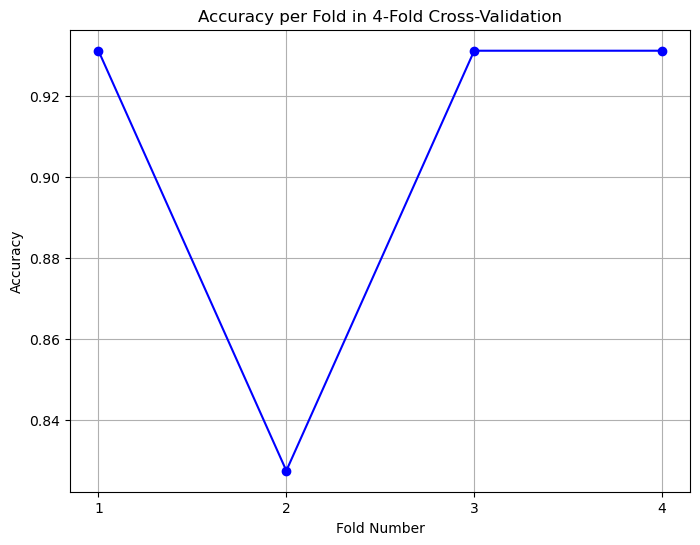

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('cleaneddata.csv')

# Separate features and target
features = df.drop(columns=['Condition'])
target = df['Condition']

# Define a new Random Forest model for RFE with a fixed random_state
rf_model = RandomForestClassifier(random_state=42)

# Fixed random state for reproducibility in feature selection
fixed_random_state = 42

# Perform RFE to select the optimal number of features
rfe = RFE(estimator=rf_model, n_features_to_select=7)  # Use 7 features based on previous result
rfe.fit(features, target)

# Get the selected feature names
selected_feature_names = features.columns[rfe.support_]
print(f"Selected features with the best performance: {selected_feature_names}")

# Use only the selected features
features_selected = features[selected_feature_names]

# Define the k-fold cross-validation with 4 folds
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=fixed_random_state)

# Initialize variables to store results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(features_selected, target), 1):
    X_train, X_test = features_selected.iloc[train_index], features_selected.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Show number of training and testing data for each fold
    print(f"\nFold {fold}:")
    print(f"Training Data: {len(X_train)} samples")
    print(f"Testing Data: {len(X_test)} samples")
    
    # Train the Random Forest model
    rf_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = rf_model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies.append(accuracy)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    confusion_matrices.append(cm)
    
    # Classification Report
    cr = classification_report(y_test, y_test_pred, output_dict=True)
    classification_reports.append(cr)
    
    # Display confusion matrix and classification report for each fold
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")

# Calculate mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"\nMean Accuracy across all 4 folds: {mean_accuracy:.4f}")

# Optionally, you can plot the accuracy for each fold
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), accuracies, marker='o', color='b', label='Accuracy')
plt.title("Accuracy per Fold in 4-Fold Cross-Validation")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.xticks(range(1, 5))
plt.grid(True)
plt.show()


In [23]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Load the dataset
df = pd.read_csv('cleaneddata.csv')

# Separate features and target
features = df.drop(columns=['Condition'])
target = df['Condition']

# Define a Random Forest model for RFE with a fixed random_state
rf_model = RandomForestClassifier(random_state=42)

# Perform RFE to select the optimal number of features
rfe = RFE(estimator=rf_model, n_features_to_select=7)
rfe.fit(features, target)

# Get the selected feature names
selected_feature_names = features.columns[rfe.support_]
print(f"Selected important features: {selected_feature_names}")

# Use only the selected features
features_selected = features[selected_feature_names]

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': list(range(1, 51)),
    'min_samples_split': list(range(2, 21)),
    'min_samples_leaf': list(range(1, 11)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Set up and fit RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                   n_iter=100, cv=4, n_jobs=-1, verbose=1, scoring='accuracy', random_state=42)
random_search.fit(features_selected, target)

# Print the best parameters
print(f"\nBest parameters: {random_search.best_params_}")


Selected important features: Index(['Cylinder heating zone 1', 'Cylinder heating zone 2',
       'Cylinder heating zone 3', 'Cylinder heating zone 5',
       'Maximum injection pressure', 'Switch-over volume', 'Material cushion'],
      dtype='object')
Fitting 4 folds for each of 100 candidates, totalling 400 fits

Best parameters: {'n_estimators': 100, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 44, 'bootstrap': True}


Selected important features: Index(['Cylinder heating zone 1', 'Cylinder heating zone 2',
       'Cylinder heating zone 3', 'Cylinder heating zone 5',
       'Maximum injection pressure', 'Switch-over volume', 'Material cushion'],
      dtype='object')

Fold 1:
Training Data: 87 samples
Testing Data: 29 samples
Confusion Matrix:
[[ 3  0  3]
 [ 0 10  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      0.50      0.67         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.81      1.00      0.90        13

    accuracy                           0.90        29
   macro avg       0.94      0.83      0.85        29
weighted avg       0.92      0.90      0.88        29


Fold 2:
Training Data: 87 samples
Testing Data: 29 samples
Confusion Matrix:
[[ 4  0  2]
 [ 0 10  0]
 [ 3  0 10]]
Classification Report:
              precision    recall  f1-score   support

  Condition1       0.57      0.67  

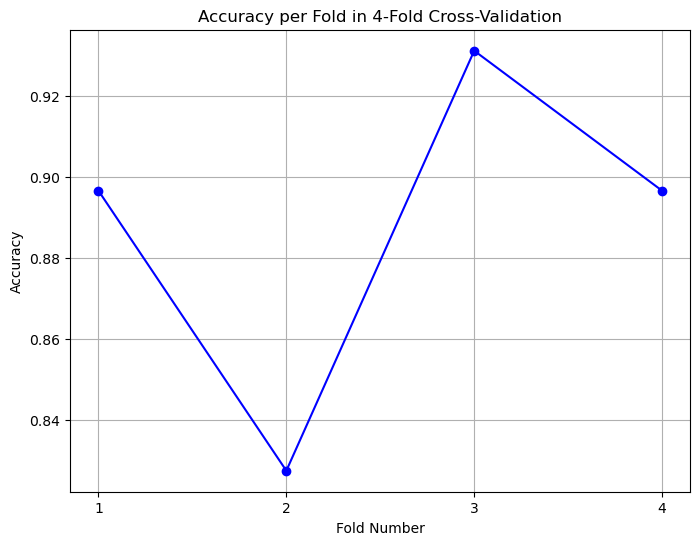

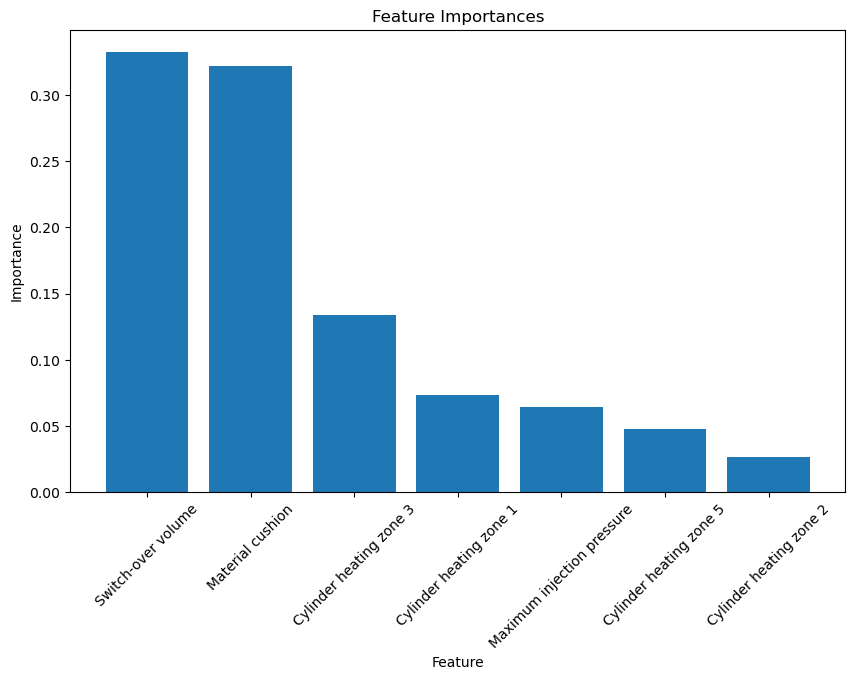


Selected important features and their importance values:
Switch-over volume: 0.3328
Material cushion: 0.3221
Cylinder heating zone 3: 0.1338
Cylinder heating zone 1: 0.0732
Maximum injection pressure: 0.0638
Cylinder heating zone 5: 0.0475
Cylinder heating zone 2: 0.0267


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('cleaneddata.csv')

# Separate features and target
features = df.drop(columns=['Condition'])
target = df['Condition']

# Define a Random Forest model for RFE with a fixed random_state
rf_model = RandomForestClassifier(random_state=42)

# Perform RFE to select the optimal number of features
rfe = RFE(estimator=rf_model, n_features_to_select=7)
rfe.fit(features, target)

# Get the selected feature names
selected_feature_names = features.columns[rfe.support_]
print(f"Selected important features: {selected_feature_names}")

# Use only the selected features
features_selected = features[selected_feature_names]

# Define the best parameters found by RandomizedSearchCV
best_params = {
    'n_estimators': 100,
    'min_samples_split': 16,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 44,
    'bootstrap': True,
    'random_state': 42
}

# Initialize the Random Forest model with the best hyperparameters
rf_model = RandomForestClassifier(**best_params)

# Define k-fold cross-validation with 4 folds
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Initialize variables to store results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(features_selected, target), 1):
    X_train, X_test = features_selected.iloc[train_index], features_selected.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Show number of training and testing data for each fold
    print(f"\nFold {fold}:")
    print(f"Training Data: {len(X_train)} samples")
    print(f"Testing Data: {len(X_test)} samples")
    
    # Train the Random Forest model
    rf_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = rf_model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies.append(accuracy)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    confusion_matrices.append(cm)
    
    # Classification Report
    cr = classification_report(y_test, y_test_pred, output_dict=True)
    classification_reports.append(cr)
    
    # Display confusion matrix and classification report for each fold
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")

# Calculate mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"\nMean Accuracy across all 4 folds: {mean_accuracy:.4f}")

# Plot accuracy per fold
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), accuracies, marker='o', color='b', label='Accuracy')
plt.title("Accuracy per Fold in 4-Fold Cross-Validation")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.xticks(range(1, 5))
plt.grid(True)
plt.show()

# Plot feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_names)), importances[indices], align='center')
plt.xticks(range(len(selected_feature_names)), selected_feature_names[indices], rotation=45)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Display selected important features and their importance values
print("\nSelected important features and their importance values:")
for feature, importance in zip(selected_feature_names[indices], importances[indices]):
    print(f"{feature}: {importance:.4f}")
